# Estudio hiperparámetros LGC

"Learning with local and global consistency" by Dengyong Zhou, Olivier Bousquet, Thomas Lal, Jason Weston, and Bernhard Schölkopf. Published in Advances in Neural Information Processing Systems, Volume 16, 2003.

Como indican en su estudio, el parámetro alpha lo fijan en 0.99

In [1]:
from metodos.GSSL.utils.Experiments import estudio_lgc_alpha, alpha_heatmap, names
import numpy as np
import os
from scipy.stats import rankdata

In [2]:
for name in names:
    estudio_lgc_alpha(name, parallel=True)

Dataset: appendicitis P: 10 - DONE
Dataset: appendicitis P: 20 - DONE
Dataset: appendicitis P: 30 - DONE
Dataset: appendicitis P: 40 - DONE
appendicitis saved
Dataset: australian P: 10 - DONE
Dataset: australian P: 20 - DONE
Dataset: australian P: 30 - DONE
Dataset: australian P: 40 - DONE
australian saved
Dataset: bupa P: 10 - DONE
Dataset: bupa P: 20 - DONE
Dataset: bupa P: 30 - DONE
Dataset: bupa P: 40 - DONE
bupa saved
Dataset: cleveland P: 10 - DONE
Dataset: cleveland P: 20 - DONE
Dataset: cleveland P: 30 - DONE
Dataset: cleveland P: 40 - DONE
cleveland saved
Dataset: contraceptive P: 10 - DONE
Dataset: contraceptive P: 20 - DONE
Dataset: contraceptive P: 30 - DONE
Dataset: contraceptive P: 40 - DONE
contraceptive saved
Dataset: dermatology P: 10 - DONE
Dataset: dermatology P: 20 - DONE
Dataset: dermatology P: 30 - DONE
Dataset: dermatology P: 40 - DONE
dermatology saved
Dataset: ecoli P: 10 - DONE
Dataset: ecoli P: 20 - DONE
Dataset: ecoli P: 30 - DONE
Dataset: ecoli P: 40 - DONE

In [5]:
matrix_names = []
all_matrix = []

for filename in os.listdir(f"lgc_alpha/"):
    if not os.path.isdir(f"lgc_alpha/" + filename):
        matrix_names.append(os.path.splitext(filename)[0])
        all_matrix.append(np.load(f"lgc_alpha/" + filename))

all_matrix = np.array(all_matrix)
print(all_matrix.shape)

(23, 10, 4)


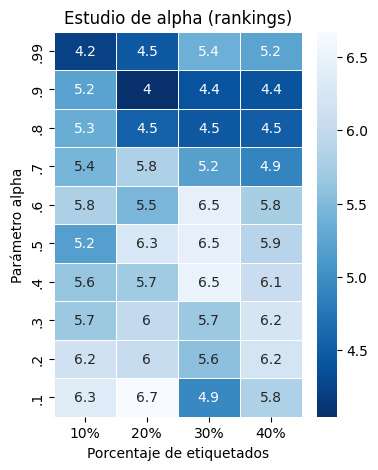

In [6]:
all_rankings = []
for a in all_matrix:
    all_rankings.append(rankdata(-a, axis=0))

mean_rankings = np.mean(all_rankings, axis=0)
alpha_heatmap(mean_rankings, "Estudio de alpha (rankings)", more_better=False)

In [7]:
np.mean(mean_rankings, axis=1)

array([4.82065217, 4.51630435, 4.71195652, 5.33695652, 5.86956522,
       5.94565217, 5.97826087, 5.88586957, 5.98913043, 5.94565217])

## Estudiar alpha desde .8 a .99

In [3]:
ya_ejecutados = []

for filename in os.listdir(f"lgc_alpha/8-99"):
    ya_ejecutados.append(os.path.splitext(filename)[0])

faltan = list(set(names) - set(ya_ejecutados))
print(faltan)
for name in faltan:
    estudio_lgc_alpha(name, alpha_values=list(np.arange(.8,1,.01)), parallel=True, path="../experimentos/lgc_alpha/8-99/{}.npy")

['tae', 'saheart', 'yeast', 'monk-2', 'wine', 'vehicle', 'zoo', 'wisconsin']
Dataset: tae P: 10 - DONE
Dataset: tae P: 20 - DONE
Dataset: tae P: 30 - DONE
Dataset: tae P: 40 - DONE
tae saved
Dataset: saheart P: 10 - DONE
Dataset: saheart P: 20 - DONE
Dataset: saheart P: 30 - DONE
Dataset: saheart P: 40 - DONE
saheart saved
Dataset: yeast P: 10 - DONE
Dataset: yeast P: 20 - DONE
Dataset: yeast P: 30 - DONE
Dataset: yeast P: 40 - DONE
yeast saved
Dataset: monk-2 P: 10 - DONE
Dataset: monk-2 P: 20 - DONE
Dataset: monk-2 P: 30 - DONE
Dataset: monk-2 P: 40 - DONE
monk-2 saved
Dataset: wine P: 10 - DONE
Dataset: wine P: 20 - DONE
Dataset: wine P: 30 - DONE
Dataset: wine P: 40 - DONE
wine saved
Dataset: vehicle P: 10 - DONE
Dataset: vehicle P: 20 - DONE
Dataset: vehicle P: 30 - DONE
Dataset: vehicle P: 40 - DONE
vehicle saved
Dataset: zoo P: 10 - DONE
Dataset: zoo P: 20 - DONE
Dataset: zoo P: 30 - DONE
Dataset: zoo P: 40 - DONE
zoo saved
Dataset: wisconsin P: 10 - DONE
Dataset: wisconsin P: 2

In [8]:
matrix_names_8_99 = []
all_matrix_8_99 = []

for filename in os.listdir(f"lgc_alpha/8-99"):
    matrix_names_8_99.append(os.path.splitext(filename)[0])
    all_matrix_8_99.append(np.load(f"lgc_alpha/8-99/" + filename))

all_matrix_8_99 = np.array(all_matrix_8_99)
print(all_matrix_8_99.shape)

(23, 20, 4)


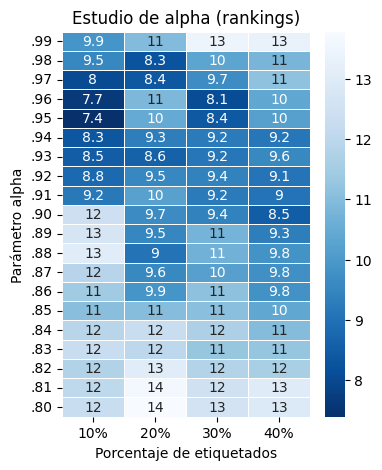

In [9]:
all_rankings_8_99 = []
for a in all_matrix_8_99:
    all_rankings_8_99.append(rankdata(-a, axis=0))

mean_rankings_8_99 = np.mean(all_rankings_8_99, axis=0)
alpha_heatmap(mean_rankings_8_99, "Estudio de alpha (rankings)", more_better=False,
              w_labels=['.99', '.98', '.97', '.96', '.95', '.94', '.93', '.92', '.91', '.90',
                        '.89', '.88', '.87', '.86', '.85', '.84', '.83', '.82', '.81', '.80']
              )

In [11]:
np.mean(mean_rankings_8_99, axis=1)

array([11.90217391,  9.72826087,  9.30978261,  9.24456522,  9.11413043,
        9.00543478,  8.96195652,  9.19565217,  9.41304348,  9.99456522,
       10.55978261, 10.64673913, 10.35326087, 10.55434783, 10.875     ,
       11.70652174, 11.70108696, 12.05434783, 12.78804348, 12.89130435])